In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [216]:
data = pd.read_excel('Data_Train.xlsx')

In [217]:
data

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [218]:
print('Rows:',data.shape[0])
print('Columns:',data.shape[1])

Rows: 10683
Columns: 11


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [220]:
data.describe().T # Five points summary

count         mean          std     min     25%     50%      75%  \
Price  10683.0  9087.064121  4611.359167  1759.0  5277.0  8372.0  12373.0   

           max  
Price  79512.0

In [221]:
data.describe(include='object').T

count unique              top  freq
Airline          10683     12      Jet Airways  3849
Date_of_Journey  10683     44       18/05/2019   504
Source           10683      5            Delhi  4537
Destination      10683      6           Cochin  4537
Route            10682    128  DEL → BOM → COK  2376
Dep_Time         10683    222            18:55   233
Arrival_Time     10683   1343            19:00   423
Duration         10683    368           2h 50m   550
Total_Stops      10682      5           1 stop  5625
Additional_Info  10683     10          No info  8345

In [222]:
# Treating date of journey
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

In [223]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [224]:
data['Weekday_Journey']=data['Date_of_Journey'].dt.weekday

In [225]:
data['Day_Journey']=data['Date_of_Journey'].dt.day
data['Month_Journey']= data['Date_of_Journey'].dt.month

In [226]:
del data['Date_of_Journey']

In [227]:
# Treating the Route column
route = data.Route.value_counts()

In [228]:
cat = route[route>np.percentile(route,95)].index

In [229]:
def route_func(r):
    if r in cat:
        return 'Busy'
    else:
        return 'Not Busy'

In [230]:
data['Route']= data['Route'].apply(route_func)

In [231]:
data

Airline    Source Destination     Route Dep_Time  Arrival_Time  \
0           IndiGo  Banglore   New Delhi      Busy    22:20  01:10 22 Mar   
1        Air India   Kolkata    Banglore  Not Busy    05:50         13:15   
2      Jet Airways     Delhi      Cochin  Not Busy    09:25  04:25 10 Jun   
3           IndiGo   Kolkata    Banglore  Not Busy    18:05         23:30   
4           IndiGo  Banglore   New Delhi  Not Busy    16:50         21:35   
...            ...       ...         ...       ...      ...           ...   
10678     Air Asia   Kolkata    Banglore      Busy    19:55         22:25   
10679    Air India   Kolkata    Banglore      Busy    20:45         23:20   
10680  Jet Airways  Banglore       Delhi      Busy    08:20         11:20   
10681      Vistara  Banglore   New Delhi      Busy    11:30         14:10   
10682    Air India     Delhi      Cochin  Not Busy    10:55         19:15   

      Duration Total_Stops Additional_Info  Price  Weekday_Journey  \
0       2h 50m    non-stop         No info   3897                6   
1       7h 25m     2 stops         No info   7662                5   
2          19h     2 stops         No info  13882                4   
3       5h 25m      1 stop         No info   6218                3   
4       4h 45m      1 stop         No info  13302                3   
...        ...         ...             ...    ...              ...   
10678   2h 30m    non-stop         No info   4107                2   
10679   2h 35m    non-stop         No info   4145                5   
10680       3h    non-stop         No info   7229                5   
10681   2h 40m    non-stop         No info  12648                3   
10682   8h 20m     2 stops         No info  11753                3   

       Day_Journey  Month_Journey  
0               24              3  
1                5              1  
2                6              9  
3                5             12  
4                3              1  
...            ...            ...  
10678            4              9  
10679           27              4  
10680           27              4  
10681            3              1  
10682            5              9  

[10683 rows x 13 columns]

In [232]:
# Treating Departure and Arrival time

In [233]:
data['Hour_departure'] = pd.to_datetime(data['Dep_Time']).dt.hour

In [234]:
data['Hour_arrival']=pd.to_datetime(data['Arrival_Time']).dt.hour

In [235]:
data.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [236]:
# Trating column duration
data[['Duration_h','Duration_m']]=data['Duration'].str.split(expand=True)

In [237]:
data['Duration_h'].value_counts()

2h     2402
1h      621
3h      501
7h      487
5h      481
9h      445
12h     428
8h      424
13h     407
11h     365
10h     355
6h      340
14h     337
15h     268
23h     265
26h     241
16h     234
4h      222
22h     218
24h     197
21h     196
25h     186
27h     179
20h     162
18h     141
19h     134
17h     129
28h      94
29h      65
30h      49
38h      34
37h      17
33h      13
32h       9
34h       8
35h       7
36h       7
31h       6
47h       2
42h       2
39h       2
5m        1
41h       1
40h       1
Name: Duration_h, dtype: int64

In [238]:
data[data['Duration_h']=='5m']

Airline  Source Destination     Route Duration Total_Stops  \
6474  Air India  Mumbai   Hyderabad  Not Busy       5m     2 stops   

     Additional_Info  Price  Weekday_Journey  Day_Journey  Month_Journey  \
6474         No info  17327                0            3              6   

      Hour_departure  Hour_arrival Duration_h Duration_m  
6474              16            16         5m       None

In [239]:
data.drop(index=[6474],inplace=True)

In [240]:
data['Duration_h'] = data['Duration_h'].str.replace('h','')
data['Duration_m'] = data['Duration_m'].str.replace('m','')

In [241]:
data['Duration_h']=data['Duration_h'].astype(int)

In [242]:
data['Duration_m'].fillna(0,inplace=True)

In [243]:
data['Duration_m']=data['Duration_m'].astype(int)

In [244]:
data['Duration_m'] = (data['Duration_h']*60)+data['Duration_m']

In [245]:
del data['Duration_h']

In [246]:
del data['Duration']

In [247]:
# Treat the total Stops
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [248]:
d = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}

In [249]:
data['Total_Stops']= data['Total_Stops'].map(d)

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Total_Stops      10681 non-null  float64
 5   Additional_Info  10682 non-null  object 
 6   Price            10682 non-null  int64  
 7   Weekday_Journey  10682 non-null  int64  
 8   Day_Journey      10682 non-null  int64  
 9   Month_Journey    10682 non-null  int64  
 10  Hour_departure   10682 non-null  int64  
 11  Hour_arrival     10682 non-null  int64  
 12  Duration_m       10682 non-null  int32  
dtypes: float64(1), int32(1), int64(6), object(5)
memory usage: 1.1+ MB


In [251]:
data.head()

Airline    Source Destination     Route  Total_Stops Additional_Info  \
0       IndiGo  Banglore   New Delhi      Busy          0.0         No info   
1    Air India   Kolkata    Banglore  Not Busy          2.0         No info   
2  Jet Airways     Delhi      Cochin  Not Busy          2.0         No info   
3       IndiGo   Kolkata    Banglore  Not Busy          1.0         No info   
4       IndiGo  Banglore   New Delhi  Not Busy          1.0         No info   

   Price  Weekday_Journey  Day_Journey  Month_Journey  Hour_departure  \
0   3897                6           24              3              22   
1   7662                5            5              1               5   
2  13882                4            6              9               9   
3   6218                3            5             12              18   
4  13302                3            3              1              16   

   Hour_arrival  Duration_m  
0             1         170  
1            13         445  
2             4        1140  
3            23         325  
4            21         285

## EXPLORE THE DATA

In [252]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Weekday_Journey', 'Day_Journey',
       'Month_Journey', 'Hour_departure', 'Hour_arrival', 'Duration_m'],
      dtype='object')

In [253]:
cat_cols = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Weekday_Journey', 'Day_Journey',
       'Month_Journey', 'Hour_departure', 'Hour_arrival']
num_cols = ['Price','Duration_m']

### UNIVARIATE ANALYSIS

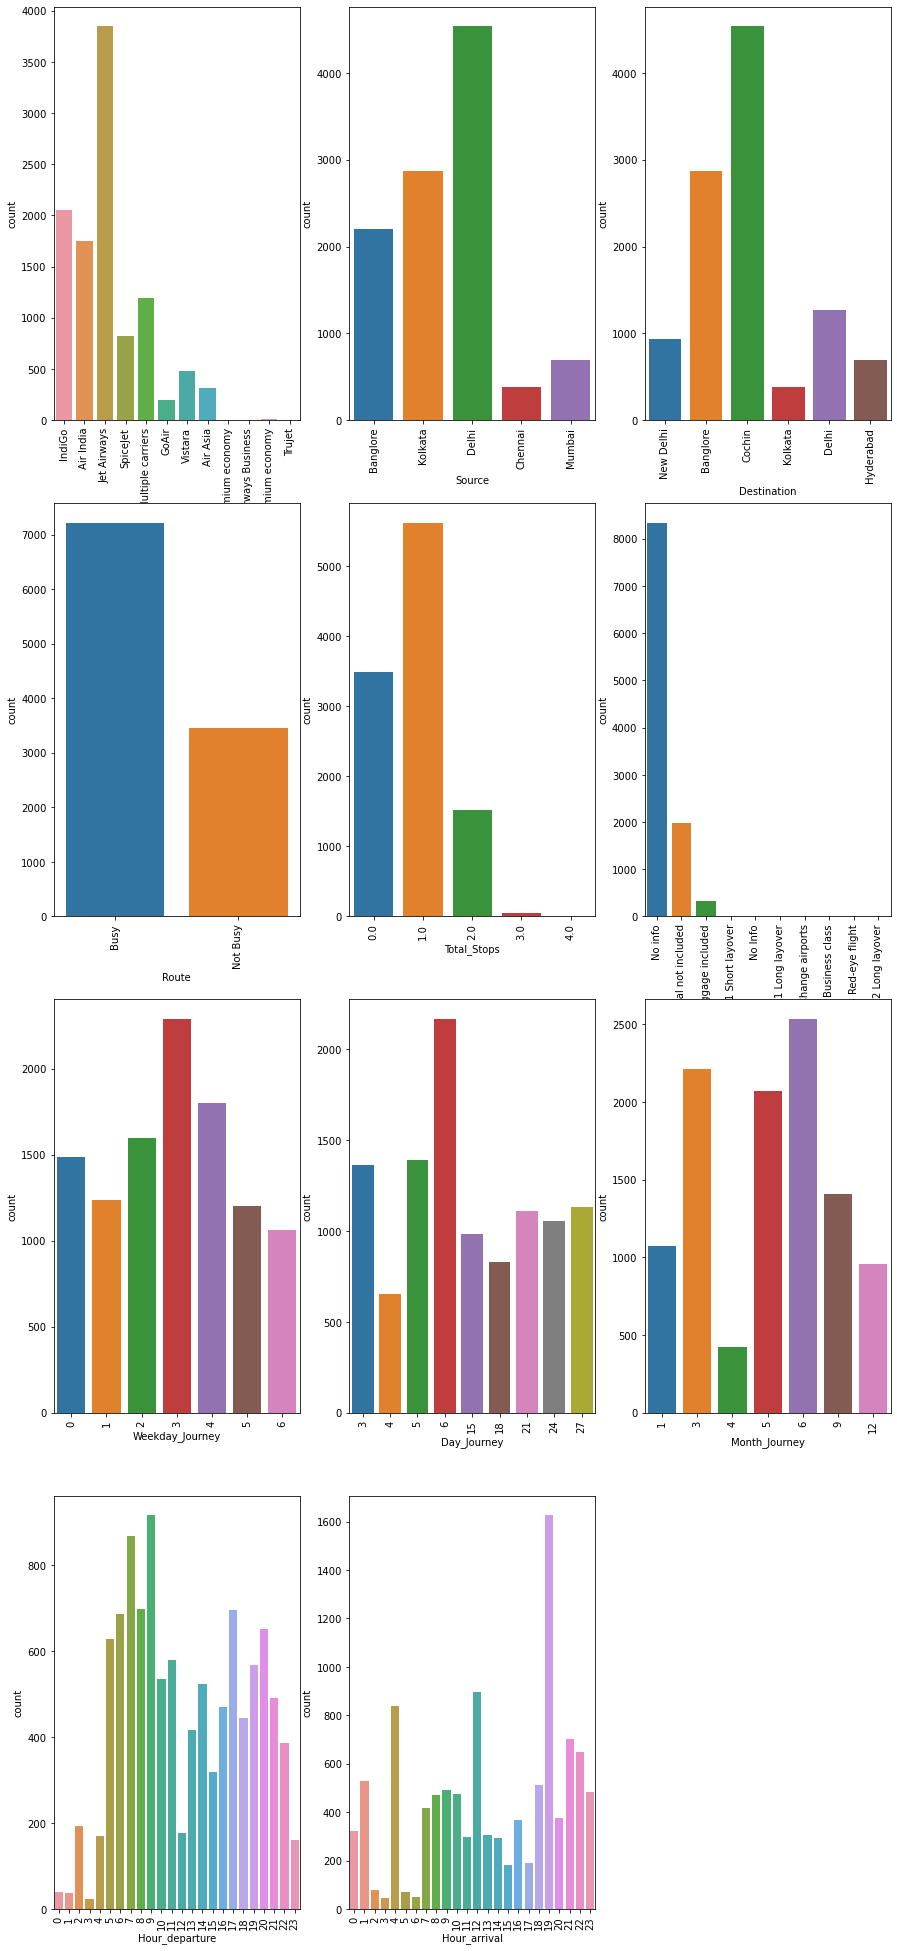

<Figure size 432x288 with 0 Axes>

In [254]:
t=1
plt.figure(figsize=(15,35))
for i in cat_cols:
    plt.subplot(4,3,t)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

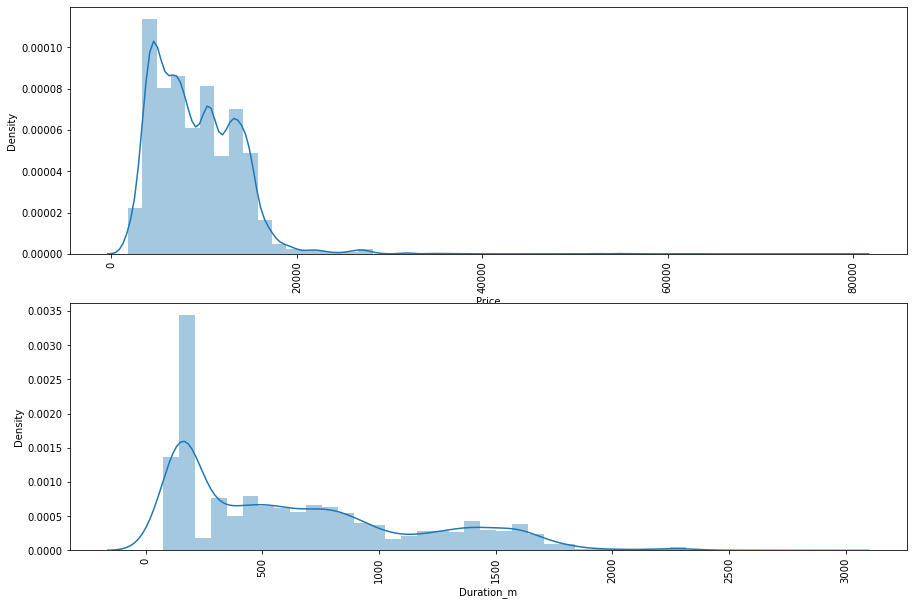

<Figure size 432x288 with 0 Axes>

In [255]:
t=1
plt.figure(figsize=(15,10))
for i in num_cols:
    plt.subplot(2,1,t)
    sns.distplot(data[i])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

### BIVARIATE ANALYSIS

In [256]:
# category vs number

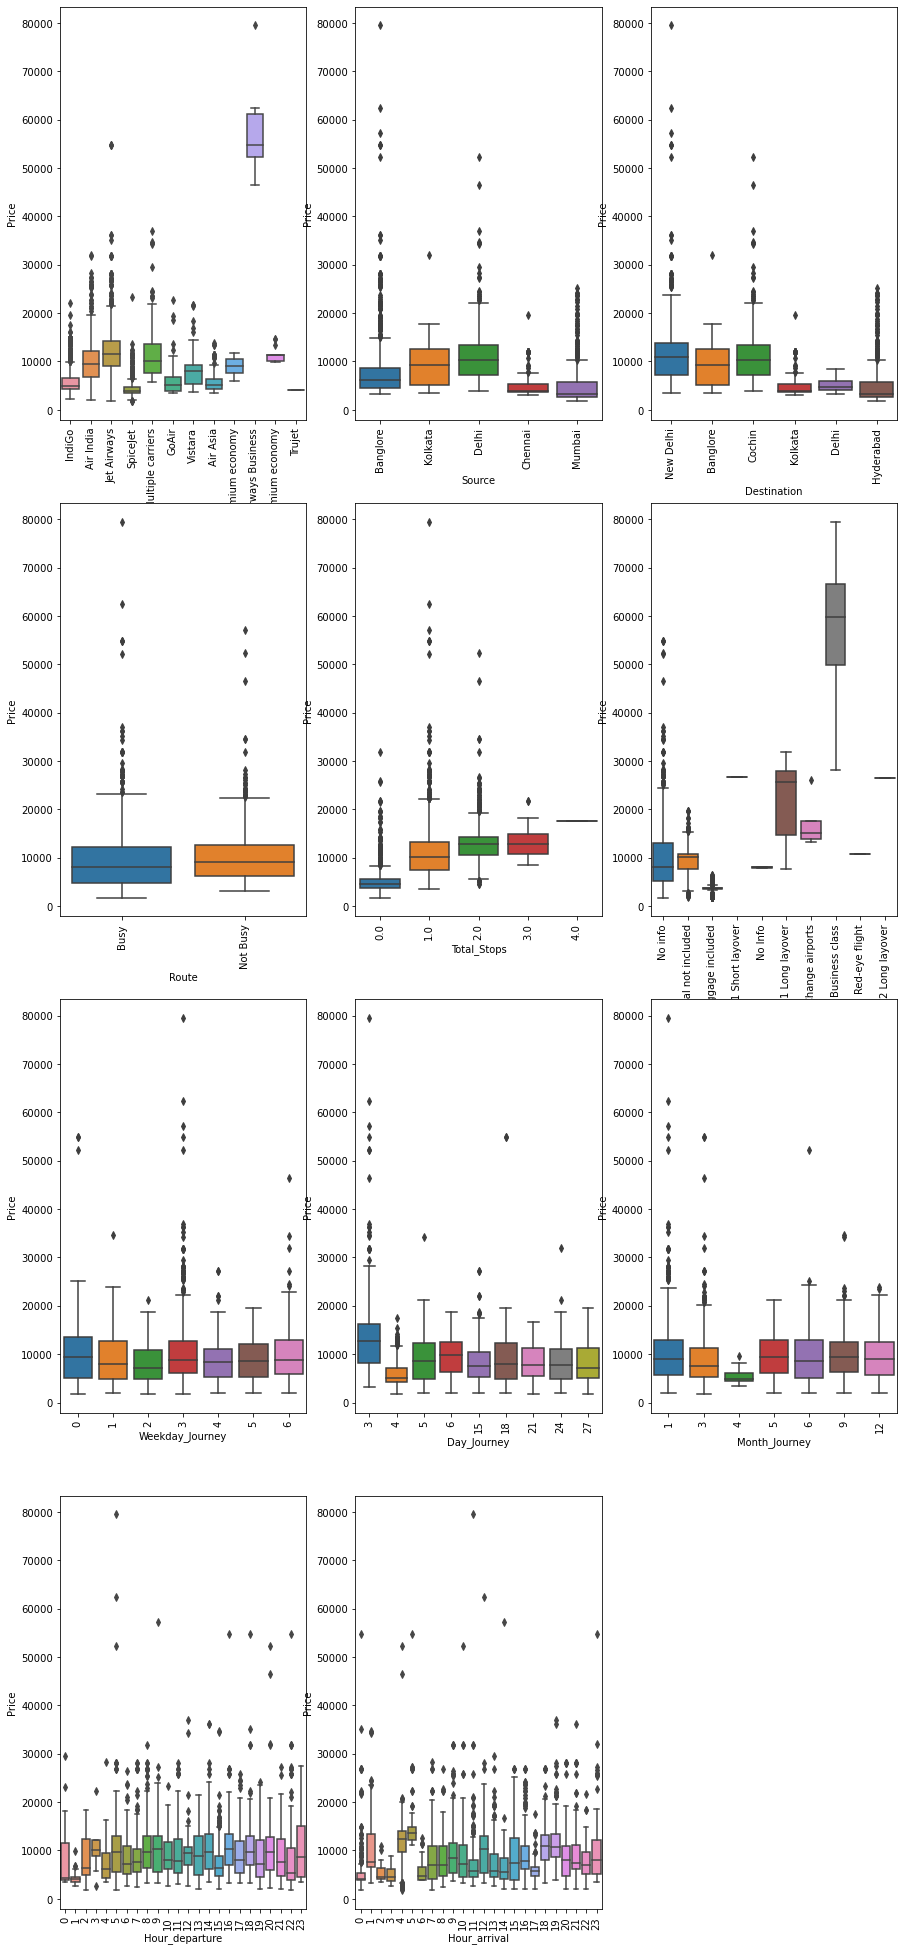

<Figure size 432x288 with 0 Axes>

In [257]:
t=1
plt.figure(figsize=(15,35))
for i in cat_cols:
    plt.subplot(4,3,t)
    sns.boxplot(data[i],data['Price'])
    plt.xticks(rotation=90)
    t+=1
plt.show()
plt.tight_layout()

<AxesSubplot:xlabel='Duration_m', ylabel='Price'>

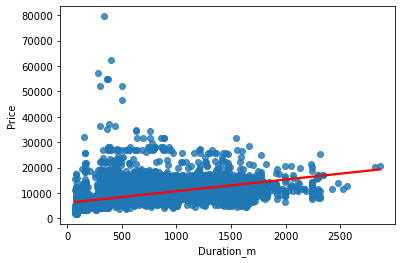

In [258]:
sns.regplot(data['Duration_m'],data['Price'],line_kws={'color':'r'})

In [259]:
data.corr()['Price']['Duration_m']

0.5066948566913768

### MISSING VALUE and OUTLIER TREATMENT

In [260]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        1
Additional_Info    0
Price              0
Weekday_Journey    0
Day_Journey        0
Month_Journey      0
Hour_departure     0
Hour_arrival       0
Duration_m         0
dtype: int64

In [261]:
data[data['Total_Stops'].isnull()]

Airline Source Destination     Route  Total_Stops Additional_Info  \
9039  Air India  Delhi      Cochin  Not Busy          NaN         No info   

      Price  Weekday_Journey  Day_Journey  Month_Journey  Hour_departure  \
9039   7480                2            5              6               9   

      Hour_arrival  Duration_m  
9039             9        1420

In [262]:
data_orig  = pd.read_excel('Data_Train.xlsx')

In [263]:
data_orig[data_orig['Total_Stops'].isnull()]

Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480

In [264]:
data.dropna(inplace=True)

In [265]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Weekday_Journey    0
Day_Journey        0
Month_Journey      0
Hour_departure     0
Hour_arrival       0
Duration_m         0
dtype: int64

### Outlier

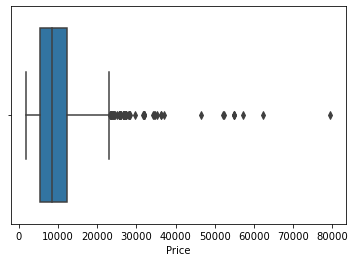

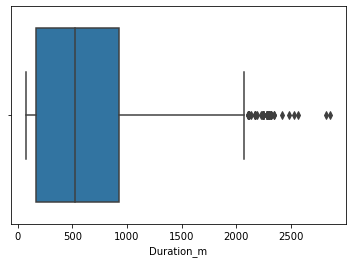

In [266]:
for i in num_cols:
    sns.boxplot(data[i])
    plt.show()

In [267]:
data[data['Price']>50000]

Airline    Source Destination     Route  Total_Stops  \
657    Jet Airways Business  Banglore   New Delhi      Busy          1.0   
1478            Jet Airways  Banglore   New Delhi      Busy          1.0   
2618            Jet Airways  Banglore   New Delhi      Busy          1.0   
2924   Jet Airways Business  Banglore   New Delhi      Busy          1.0   
5372   Jet Airways Business  Banglore   New Delhi      Busy          1.0   
5439            Jet Airways  Banglore   New Delhi      Busy          1.0   
9715   Jet Airways Business     Delhi      Cochin  Not Busy          2.0   
10364  Jet Airways Business  Banglore   New Delhi  Not Busy          1.0   

      Additional_Info  Price  Weekday_Journey  Day_Journey  Month_Journey  \
657           No info  52229                3            3              1   
1478          No info  54826                0           18              3   
2618          No info  54826                0           18              3   
2924   Business class  79512                3            3              1   
5372   Business class  62427                3            3              1   
5439          No info  54826                3            3              1   
9715          No info  52285                0            3              6   
10364  Business class  57209                3            3              1   

       Hour_departure  Hour_arrival  Duration_m  
657                 5            10         300  
1478               18             0         365  
2618               22             5         375  
2924                5            11         340  
5372                5            12         400  
5439               16            23         365  
9715               20             4         500  
10364               9            14         280

In [268]:
data[data['Duration_m']>2000]

Airline    Source Destination     Route  Total_Stops  \
226    Jet Airways     Delhi      Cochin  Not Busy          2.0   
470    Jet Airways     Delhi      Cochin  Not Busy          2.0   
553      Air India     Delhi      Cochin  Not Busy          2.0   
919      Air India   Kolkata    Banglore  Not Busy          3.0   
925    Jet Airways     Delhi      Cochin  Not Busy          2.0   
...            ...       ...         ...       ...          ...   
9848     Air India  Banglore   New Delhi  Not Busy          2.0   
10020    Air India     Delhi      Cochin  Not Busy          2.0   
10326    Air India  Banglore   New Delhi  Not Busy          2.0   
10456  Jet Airways     Delhi      Cochin  Not Busy          2.0   
10639    Air India     Delhi      Cochin  Not Busy          3.0   

      Additional_Info  Price  Weekday_Journey  Day_Journey  Month_Journey  \
226           No info  18799                6            3              3   
470           No info  13082                3           21              3   
553           No info  10598                1            3              9   
919           No info  10991                3            5             12   
925           No info  19907                0            3              6   
...               ...    ...              ...          ...            ...   
9848          No info  17135                3            3              1   
10020         No info   9653                3            5              9   
10326         No info  11791                6            3              3   
10456         No info  20694                0            3              6   
10639         No info  10493                2            6              3   

       Hour_departure  Hour_arrival  Duration_m  
226                 5            18        2245  
470                18             4        2045  
553                 5            19        2295  
919                12            23        2115  
925                16             4        2135  
...               ...           ...         ...  
9848                8            23        2345  
10020               5            19        2295  
10326               5            22        2420  
10456              19            18        2860  
10639               5            19        2280  

[82 rows x 13 columns]

### ENCODING

In [269]:
data.head()

Airline    Source Destination     Route  Total_Stops Additional_Info  \
0       IndiGo  Banglore   New Delhi      Busy          0.0         No info   
1    Air India   Kolkata    Banglore  Not Busy          2.0         No info   
2  Jet Airways     Delhi      Cochin  Not Busy          2.0         No info   
3       IndiGo   Kolkata    Banglore  Not Busy          1.0         No info   
4       IndiGo  Banglore   New Delhi  Not Busy          1.0         No info   

   Price  Weekday_Journey  Day_Journey  Month_Journey  Hour_departure  \
0   3897                6           24              3              22   
1   7662                5            5              1               5   
2  13882                4            6              9               9   
3   6218                3            5             12              18   
4  13302                3            3              1              16   

   Hour_arrival  Duration_m  
0             1         170  
1            13         445  
2             4        1140  
3            23         325  
4            21         285

In [271]:
# Target encoding
d = round(data.groupby(by=['Airline'])['Price'].mean(),0).to_dict()

In [272]:
d

{'Air Asia': 5590.0,
 'Air India': 9608.0,
 'GoAir': 5861.0,
 'IndiGo': 5674.0,
 'Jet Airways': 11644.0,
 'Jet Airways Business': 58359.0,
 'Multiple carriers': 10903.0,
 'Multiple carriers Premium economy': 11419.0,
 'SpiceJet': 4338.0,
 'Trujet': 4140.0,
 'Vistara': 7796.0,
 'Vistara Premium economy': 8962.0}

In [273]:
data['Airline']=data['Airline'].map(d)

In [275]:
# Source and destination

In [277]:
# Frequency Encoding
d = data.Source.value_counts().to_dict()

In [278]:
data['Source'] = data['Source'].map(d)

In [281]:
d = data['Destination'].value_counts().to_dict()

In [282]:
data['Destination'] = data['Destination'].map(d)

In [284]:
# Label Encoding
data['Route'] = np.where(data['Route']=='Busy',1,0)

In [285]:
data

Airline  Source  Destination  Route  Total_Stops Additional_Info  \
0       5674.0    2197          932      1          0.0         No info   
1       9608.0    2871         2871      0          2.0         No info   
2      11644.0    4536         4536      0          2.0         No info   
3       5674.0    2871         2871      0          1.0         No info   
4       5674.0    2197          932      0          1.0         No info   
...        ...     ...          ...    ...          ...             ...   
10678   5590.0    2871         2871      1          0.0         No info   
10679   9608.0    2871         2871      1          0.0         No info   
10680  11644.0    2197         1265      1          0.0         No info   
10681   7796.0    2197          932      1          0.0         No info   
10682   9608.0    4536         4536      0          2.0         No info   

       Price  Weekday_Journey  Day_Journey  Month_Journey  Hour_departure  \
0       3897                6           24              3              22   
1       7662                5            5              1               5   
2      13882                4            6              9               9   
3       6218                3            5             12              18   
4      13302                3            3              1              16   
...      ...              ...          ...            ...             ...   
10678   4107                2            4              9              19   
10679   4145                5           27              4              20   
10680   7229                5           27              4               8   
10681  12648                3            3              1              11   
10682  11753                3            5              9              10   

       Hour_arrival  Duration_m  
0                 1         170  
1                13         445  
2                 4        1140  
3                23         325  
4                21         285  
...             ...         ...  
10678            22         150  
10679            23         155  
10680            11         180  
10681            14         160  
10682            19         500  

[10681 rows x 13 columns]

In [286]:
# Bining
data['Additional_Info'].value_counts()

No info                         8343
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [287]:
def info(col):
    if col in ['No info','No Info']:
        return 0
    else:
        return 1

In [288]:
data['Additional_Info']= data['Additional_Info'].apply(info)

In [289]:
data

Airline  Source  Destination  Route  Total_Stops  Additional_Info  \
0       5674.0    2197          932      1          0.0                0   
1       9608.0    2871         2871      0          2.0                0   
2      11644.0    4536         4536      0          2.0                0   
3       5674.0    2871         2871      0          1.0                0   
4       5674.0    2197          932      0          1.0                0   
...        ...     ...          ...    ...          ...              ...   
10678   5590.0    2871         2871      1          0.0                0   
10679   9608.0    2871         2871      1          0.0                0   
10680  11644.0    2197         1265      1          0.0                0   
10681   7796.0    2197          932      1          0.0                0   
10682   9608.0    4536         4536      0          2.0                0   

       Price  Weekday_Journey  Day_Journey  Month_Journey  Hour_departure  \
0       3897                6           24              3              22   
1       7662                5            5              1               5   
2      13882                4            6              9               9   
3       6218                3            5             12              18   
4      13302                3            3              1              16   
...      ...              ...          ...            ...             ...   
10678   4107                2            4              9              19   
10679   4145                5           27              4              20   
10680   7229                5           27              4               8   
10681  12648                3            3              1              11   
10682  11753                3            5              9              10   

       Hour_arrival  Duration_m  
0                 1         170  
1                13         445  
2                 4        1140  
3                23         325  
4                21         285  
...             ...         ...  
10678            22         150  
10679            23         155  
10680            11         180  
10681            14         160  
10682            19         500  

[10681 rows x 13 columns]

### Train Test Split

In [290]:
x = data.drop(columns=['Price'])
y = data['Price']

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8)

In [296]:
test_y

9216     13292
2990     11087
2077      4823
1372      4256
7672      7690
         ...  
10560    14178
6837      2227
7485     14657
10531     3100
4424      7054
Name: Price, Length: 2137, dtype: int64